In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
os.getcwd()

'C:\\Users\\Pasindu Siriwardana\\JupyterNoteBookFiles\\Projects\\Medical-Data-Visualizer'

In [4]:
df = pd.read_csv('medical_examination.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
# can use replace({True:1, False:0}) too
df['overweight'] = (df.weight/((df.height/100)**2) > 25).astype(int)

In [7]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [8]:
# Normalize
df.loc[df.cholesterol == 1, 'cholesterol'] = 0
df.loc[df.cholesterol > 1, 'cholesterol'] = 1
df.loc[df.gluc == 1, 'gluc'] = 0
df.loc[df.gluc > 1, 'gluc'] = 1
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [9]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [106]:
table = pd.pivot_table(
    df,
    values = 'cholesterol',
    index = df.columns.tolist()
)
table

,,,,,,,,,,,,,
id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1


In [ ]:
df.head()

In [66]:
df_long = pd.melt(
    df,
    id_vars = ['cardio'],
    value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
)
df_long.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


In [67]:
# df_long = df_long.groupby('cardio')
# df_long.last()

In [68]:
# df_long.first()

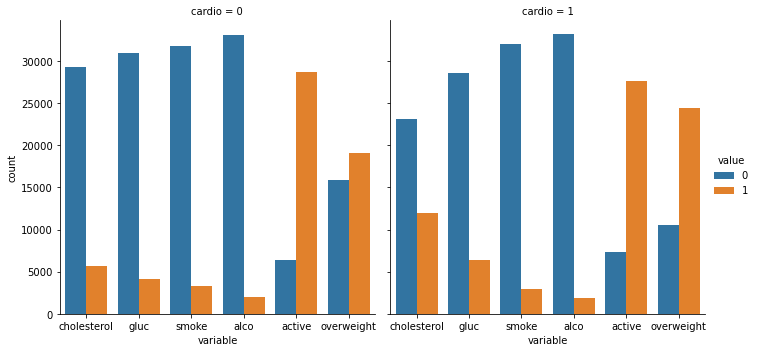

In [75]:
# catplot only support long formatted dataframes
# sns.catplot(
#     data = df_long,
#     x = "variable",
#     # y = "value",
#     height = 4,
#     aspect = 1.8,
#     kind = "count",
#     col = "cardio"
# )
sns.catplot(data=df_long, x="variable",hue='value',col='cardio', kind="count")

In [48]:
df_test = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

In [49]:
df_test

,A,B,C,D
0,foo,one,1.163362,0.574160
1,bar,one,-0.140348,-0.455943
2,foo,two,1.676383,-1.179352
3,bar,three,-0.229051,0.175637
4,foo,two,0.362822,-1.886294
5,bar,two,0.342626,-0.252966
6,foo,one,0.439706,-0.053288
7,foo,three,-1.969735,-1.327257


In [55]:
grouped_A = df_test.groupby('B')
grouped_A.first()

,A,C,D
B,,,
one,foo,1.163362,0.574160
three,bar,-0.229051,0.175637
two,foo,1.676383,-1.179352


In [56]:
grouped_A.last()

,A,C,D
B,,,
one,foo,0.439706,-0.053288
three,foo,-1.969735,-1.327257
two,bar,0.342626,-0.252966


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  overweight   70000 non-null  int32  
dtypes: float64(1), int32(1), int64(12)
memory usage: 7.2 MB


In [77]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


# filter out records which are ap_lo > ap_hi
# filter out records which have height < 2.5 th percentile
# filter out records which have height > 97.5 th percentile
# filter out records which have weight < 2.5 th percentile
# filter out records which have weight > 97.5 th percentile

In [89]:
# filter out records which are ap_lo > ap_hi
df = df[~(df.ap_lo > df.ap_hi)]
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [88]:
df[(df.ap_lo > df.ap_hi)]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight


In [95]:
# filter out records which have height < 2.5 th percentile
np.percentile(df.height, 2.5)
df = df[~(df.height < np.percentile(df.height, 2.5))]

In [96]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [99]:
# filter out records which have height > 97.5 th percentile
df = df[~(df.height > np.percentile(df.height, 97.5))]
# filter out records which have weight < 2.5 th percentile
df = df[~(df.weight < np.percentile(df.weight, 2.5))]
# filter out records which have weight > 97.5 th percentile
df = df[~(df.weight > np.percentile(df.weight, 97.5))]
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [98]:
np.percentile(df.height, 97.5)

180.0

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62784 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           62784 non-null  int64  
 1   age          62784 non-null  int64  
 2   sex          62784 non-null  int64  
 3   height       62784 non-null  int64  
 4   weight       62784 non-null  float64
 5   ap_hi        62784 non-null  int64  
 6   ap_lo        62784 non-null  int64  
 7   cholesterol  62784 non-null  int64  
 8   gluc         62784 non-null  int64  
 9   smoke        62784 non-null  int64  
 10  alco         62784 non-null  int64  
 11  active       62784 non-null  int64  
 12  cardio       62784 non-null  int64  
 13  overweight   62784 non-null  int32  
dtypes: float64(1), int32(1), int64(12)
memory usage: 6.9 MB


In [106]:
df.notna().all()

id             True
age            True
sex            True
height         True
weight         True
ap_hi          True
ap_lo          True
cholesterol    True
gluc           True
smoke          True
alco           True
active         True
cardio         True
overweight     True
dtype: bool

In [107]:
df_test2 = pd.DataFrame([(1, 1), (2, np.nan), (np.nan, 3), (4, 4)],
                  columns=['dogs', 'cats'])
df_test2

,dogs,cats
0,1.0,1.0
1,2.0,NaN
2,NaN,3.0
3,4.0,4.0


In [113]:
corr = df.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002623,0.003799,0.000221,0.000144,0.003489,0.000429,0.003867,0.002477,-0.002403,-0.001039,0.005890,0.003770,-0.000769
age,0.002623,1.000000,-0.018274,-0.077426,0.069705,0.018482,0.152787,0.129582,0.087280,-0.044208,-0.026956,-0.011471,0.239987,0.089282
sex,0.003799,-0.018274,1.000000,0.504722,0.130116,0.004941,0.059500,-0.037669,-0.021178,0.337682,0.169178,0.007702,0.001727,-0.055146
height,0.000221,-0.077426,0.504722,1.000000,0.248868,0.004300,0.015356,-0.064477,-0.031410,0.187389,0.089257,-0.005042,-0.025673,-0.156139
weight,0.000144,0.069705,0.130116,0.248868,1.000000,0.026527,0.223786,0.132686,0.104475,0.055805,0.058286,-0.012112,0.166886,0.655764
ap_hi,0.003489,0.018482,0.004941,0.004300,0.026527,1.000000,0.072260,0.022606,0.011004,-0.001978,0.000607,-0.000162,0.050321,0.016900
ap_lo,0.000429,0.152787,0.059500,0.015356,0.223786,0.072260,1.000000,0.148701,0.073920,0.022997,0.031839,0.002184,0.326125,0.169567
cholesterol,0.003867,0.129582,-0.037669,-0.064477,0.132686,0.022606,0.148701,1.000000,0.383601,0.012797,0.037588,0.002804,0.202257,0.126770
gluc,0.002477,0.087280,-0.021178,-0.031410,0.104475,0.011004,0.073920,0.383601,1.000000,-0.004203,0.013617,-0.009629,0.088267,0.086850
smoke,-0.002403,-0.044208,0.337682,0.187389,0.055805,-0.001978,0.022997,0.012797,-0.004203,1.000000,0.341434,0.027203,-0.020605,-0.003981


In [114]:
corr.isna().any()

id             False
age            False
sex            False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
overweight     False
dtype: bool

<AxesSubplot:>

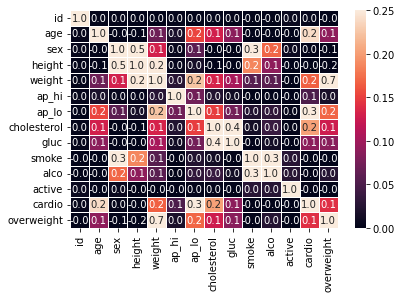

In [120]:
sns.heatmap(
    corr,
    annot = True,    # Values are shown in squares
    fmt = ".1f",     # formatting of the annotations
    linewidth = 0.5, # add lines within squares
    vmin = 0,
    vmax = 0.25
)

In [168]:
# we need to cover the things on the top of the diagonal as empty so will need to create a mask
# the graph to be plotted is what we call a triangular correlation graph
mask = np.triu(np.ones_like(corr))
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<AxesSubplot:>

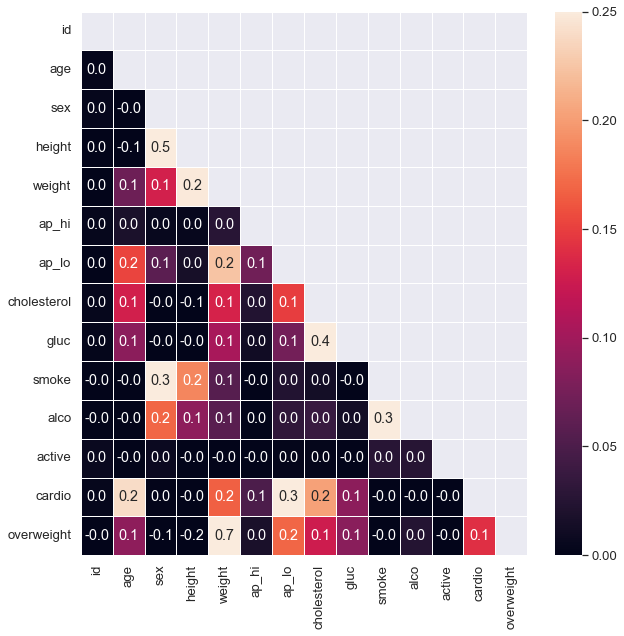

In [170]:
plt.figure(
    figsize = (10,10),
    facecolor = 'w',
    edgecolor = 'k'
)

sns.set(font_scale = 1.2)

sns.heatmap(
    corr,
    annot = True,    # Values are shown in squares
    fmt = ".1f",     # formatting of the annotations
    linewidth = 0.5, # add lines within squares
    vmin = 0,
    vmax = 0.25,
    mask = mask
)

# sns.heatmap(
#     corr,
#     cmap='coolwarm',
#     center = 0, 
#     annot=True,
#     fmt='.1g',
#     mask=mask
# )

In [131]:
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002623,0.003799,0.000221,0.000144,0.003489,0.000429,0.003867,0.002477,-0.002403,-0.001039,0.005890,0.003770,-0.000769
age,0.002623,1.000000,-0.018274,-0.077426,0.069705,0.018482,0.152787,0.129582,0.087280,-0.044208,-0.026956,-0.011471,0.239987,0.089282
sex,0.003799,-0.018274,1.000000,0.504722,0.130116,0.004941,0.059500,-0.037669,-0.021178,0.337682,0.169178,0.007702,0.001727,-0.055146
height,0.000221,-0.077426,0.504722,1.000000,0.248868,0.004300,0.015356,-0.064477,-0.031410,0.187389,0.089257,-0.005042,-0.025673,-0.156139
weight,0.000144,0.069705,0.130116,0.248868,1.000000,0.026527,0.223786,0.132686,0.104475,0.055805,0.058286,-0.012112,0.166886,0.655764
ap_hi,0.003489,0.018482,0.004941,0.004300,0.026527,1.000000,0.072260,0.022606,0.011004,-0.001978,0.000607,-0.000162,0.050321,0.016900
ap_lo,0.000429,0.152787,0.059500,0.015356,0.223786,0.072260,1.000000,0.148701,0.073920,0.022997,0.031839,0.002184,0.326125,0.169567
cholesterol,0.003867,0.129582,-0.037669,-0.064477,0.132686,0.022606,0.148701,1.000000,0.383601,0.012797,0.037588,0.002804,0.202257,0.126770
gluc,0.002477,0.087280,-0.021178,-0.031410,0.104475,0.011004,0.073920,0.383601,1.000000,-0.004203,0.013617,-0.009629,0.088267,0.086850
smoke,-0.002403,-0.044208,0.337682,0.187389,0.055805,-0.001978,0.022997,0.012797,-0.004203,1.000000,0.341434,0.027203,-0.020605,-0.003981


In [139]:
range(len(corr.columns))

range(0, 14)

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
df['overweight'] = (df.weight/((df.height/100)**2) > 25).astype(int)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df.loc[df.cholesterol == 1, 'cholesterol'] = 0
df.loc[df.cholesterol > 1, 'cholesterol'] = 1
df.loc[df.gluc == 1, 'gluc'] = 0
df.loc[df.gluc > 1, 'gluc'] = 1

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(
                df,
                id_vars = ['cardio'],
                value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
            )


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    # df_cat = None
    

    # Draw the catplot with 'sns.catplot()'
    
  
    # Get the figure for the output
    fig = sns.catplot(
            data=df_cat, 
            x="variable",
            hue='value',
            col='cardio', 
            kind="count"
          )


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    # filter out records which are ap_lo > ap_hi
    df_heat = df[~(df.ap_lo > df.ap_hi)]
    # filter out records which have height < 2.5 th percentile
    df_heat = df_heat[~(df_heat.height < np.percentile(df_heat.height, 2.5))]
    # filter out records which have height > 97.5 th percentile
    df_heat = df_heat[~(df_heat.height > np.percentile(df_heat.height, 97.5))]
    # filter out records which have weight < 2.5 th percentile
    df_heat = df_heat[~(df_heat.weight < np.percentile(df_heat.weight, 2.5))]
    # filter out records which have weight > 97.5 th percentile
    df_heat = df_heat[~(df_heat.weight > np.percentile(df_heat.weight, 97.5))]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr))



    # Set up the matplotlib figure
    fig, ax = plt.subplots(1,1
                  # figsize = (10,10),
                  # facecolor = 'w',
                  # edgecolor = 'k'
              )

    sns.set(font_scale = 1.2)

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(
            corr,
            annot = True,    # Values are shown in squares
            fmt = ".1f",     # formatting of the annotations
            linewidth = 0.5, # add lines within squares
            vmin = 0,
            vmax = 0.25,
            mask = mask
        )


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


Figure(432x288)


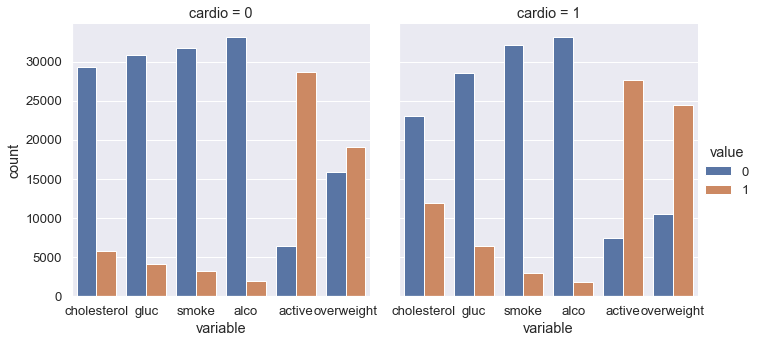

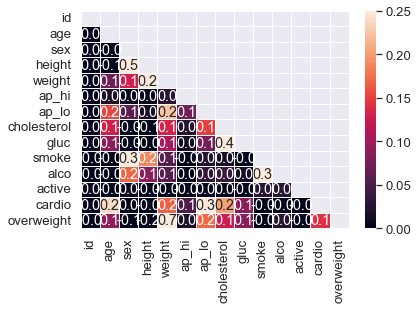

In [8]:
print(draw_cat_plot())
print(draw_heat_map())

In [4]:
plt.subplots?

Signature:
plt.subplots(
    nrows=1,
    ncols=1,
    *,
    sharex=False,
    sharey=False,
    squeeze=True,
    subplot_kw=None,
    gridspec_kw=None,
    **fig_kw,
)
Docstring:
Create a figure and a set of subplots.

This utility wrapper makes it convenient to create common layouts of
subplots, including the enclosing figure object, in a single call.

Parameters
----------
nrows, ncols : int, default: 1
    Number of rows/columns of the subplot grid.

sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
    Controls sharing of properties among x (*sharex*) or y (*sharey*)
    axes:

    - True or 'all': x- or y-axis will be shared among all subplots.
    - False or 'none': each subplot x- or y-axis will be independent.
    - 'row': each subplot row will share an x- or y-axis.
    - 'col': each subplot column will share an x- or y-axis.

    When subplots have a shared x-axis along a column, only the x tick
    labels of the bottom subplot are created. Similarly, 